# Data Mining Project
### Giorgio Donati, g.donati24@studenti.unipi.it
### Pietro Francaviglia, p.francaviglia1@studenti.unipi.it
#### A.Y. 2021-2022


## Libraries and datasets

In [1]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree

from t3_constants import *
from t3_utility import *

# Bagging
## Training

In [2]:
with open(f'{PICKLE_FOLDER}{TRAIN}{X}.pkl', 'rb') as f:
    train_x = pickle.load(f)
with open(f'{PICKLE_FOLDER}{TRAIN}{Y}.pkl', 'rb') as f:
    train_y = pickle.load(f)

In [3]:
# parameters dictionary for Bagging grid search
param_d = {
    CRT: ['gini', 'entropy'],
    MSL : [1, 3],
    MSS : [2, 5, 10],
    NEST: np.logspace(1, 2.5, num=10).astype(int).tolist()
}
# iteration on parameters to collect results
combinations = itertools.product(*(param_d[key] for key in sorted(param_d)))
results = []
for criterion, min_samples_leaf, min_samples_split, n_estimators in combinations:
    model = BaggingClassifier(
        base_estimator=tree.DecisionTreeClassifier(
            criterion=criterion,
            min_samples_leaf=min_samples_leaf,
            min_samples_split=min_samples_split
        ),
        n_estimators=n_estimators,
    )
    mean_val_score, std_val_score = cross_validation_summary(model, train_x.values, train_y.values)
    res = criterion, min_samples_leaf, min_samples_split, n_estimators, mean_val_score, std_val_score
    results.append(res)

# print top 5 combination results
bagging_results_df = pd.DataFrame(
    results,
    columns=sorted(param_d)+[MVS, SVS]
    )
bagging_results_df.sort_values(MVS, ascending = False).head(5)

,criterion,min_samples_leaf,min_samples_split,n_estimators,mean_val_score,std_val_score
77,entropy,1,5,146,0.886489,0.031920
69,entropy,1,2,316,0.881714,0.028539
68,entropy,1,2,215,0.880127,0.022852
74,entropy,1,5,46,0.880114,0.033344
67,entropy,1,2,146,0.878514,0.028552


In [4]:
bagging_results_df[NEST]

0       10
1       14
2       21
3       31
4       46
      ... 
115     68
116    100
117    146
118    215
119    316
Name: n_estimators, Length: 120, dtype: int64

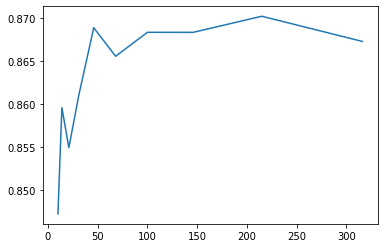

In [5]:
plt.plot(bagging_results_df.groupby(NEST)[NEST].first(), bagging_results_df.groupby(NEST)[MVS].mean())
plt.show()

### Comparison between criterions

In [6]:
bagging_results_df.groupby(CRT)[[MVS, SVS]].mean()

,mean_val_score,std_val_score
criterion,,
entropy,0.865359,0.032956
gini,0.860988,0.038524


In [10]:
# gini result to be better
best_result = bagging_results_df.sort_values(MVS).tail(1)

# best model
test_model = BaggingClassifier(
    base_estimator=tree.DecisionTreeClassifier(
        criterion=best_result[CRT].values[0],
        min_samples_leaf=best_result[MSL].values[0],
        min_samples_split=best_result[MSS].values[0]
    ),
    n_estimators=best_result[NEST].values[0],
)

test_model.fit(train_x, train_y)
test_model

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        min_samples_split=5),
                  n_estimators=146)

## Testing

In [ ]:
with open(f'{PICKLE_FOLDER}{TEST}{X}.pkl', 'rb') as f:
    test_x = pickle.load(f)
with open(f'{PICKLE_FOLDER}{TEST}{Y}.pkl', 'rb') as f:
    test_y = pickle.load(f)

In [ ]:
# Around 
test_model.score(test_x, test_y)

0.89171974522293